Start by importing the required packages: 
Pandas, Seaborn, Matplotlib, and Numpy

In [107]:
import pandas as pd

In [108]:
import seaborn as sns

In [109]:
import matplotlib.pyplot as plt

In [110]:
import numpy as np

Import the Sales data through the local file method

In [111]:
df = pd.read_csv(r"C:\Users\jsrei\OneDrive\Desktop\MBAN 6110\sales_data.csv")

Get an overview of the data by looking at the different columns, their data types, and their descriptive statistics

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [113]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


Taking a look at the first 10 and last 10 records in the data to understand how it is structured

In [114]:
df.head(10)

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
5,Product_45,Region_1,8.63,11.0,2022-01-06
6,Product_31,Region_3,23.73,6.0,2022-01-07
7,Product_18,Region_7,19.27,9.0,2022-01-08
8,Product_16,Region_9,30.70,14.0,2022-01-09
9,Product_9,Region_2,264.05,7.0,2022-01-10


In [115]:
df.tail(10)

,Product,Region,Price,Units Sold,Sale Date
1040,Product_44,Region_9,101.69,NaN,2024-09-11
1041,Product_30,Region_3,8.76,13.0,2024-06-23
1042,Product_6,Region_9,14.36,16.0,2024-08-13
1043,Product_20,Region_6,58.50,9.0,2022-10-06
1044,Product_48,Region_10,23.57,6.0,2024-02-28
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27
1049,Product_16,Region_2,69.30,8.0,2024-02-23


Drop the duplicate values in the data as to not provide one area with extra values that could scue the data

In [116]:
df.drop_duplicates(inplace=True)

Reordering the data from oldest sale date to newest 

In [117]:
df.sort_values(by='Sale Date', ascending=True)

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
995,NaN,Region_7,31.83,13.0,2024-09-22
996,Product_36,NaN,46.19,9.0,2024-09-23
997,NaN,Region_7,311.80,13.0,2024-09-24
998,Product_2,Region_10,43.44,15.0,2024-09-25


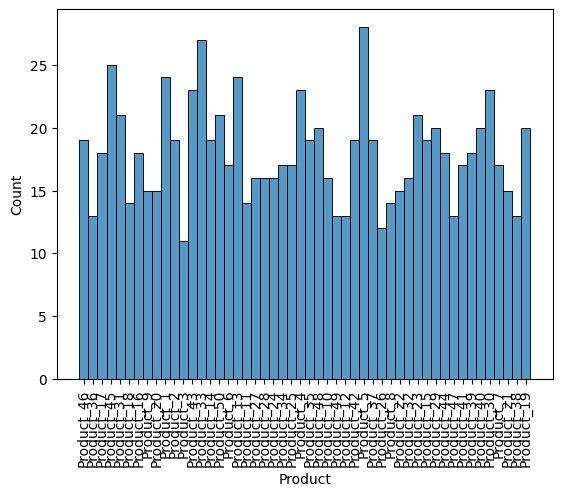

In [118]:
sns.histplot(df['Product'])
plt.xticks(rotation = 90)
plt.show()

The above graph shows that the occurence of each product sold is fairly consistent across each product excluding other which is not an issue

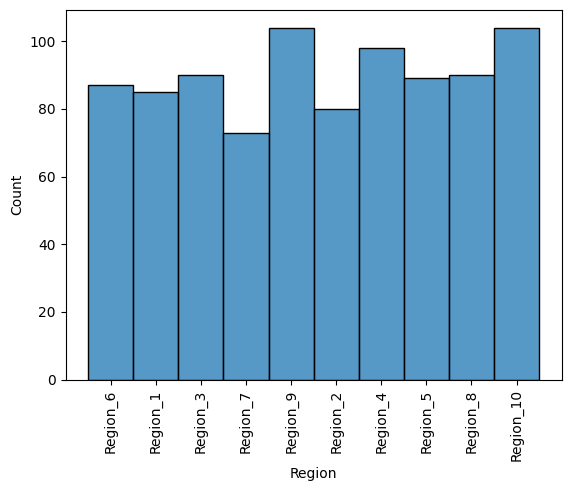

In [119]:
sns.histplot(df['Region'])
plt.xticks(rotation = 90)
plt.show()

This shows us that the occurence of each region is consistent across each telling us there is probably no issue here

<Axes: xlabel='Price', ylabel='Count'>

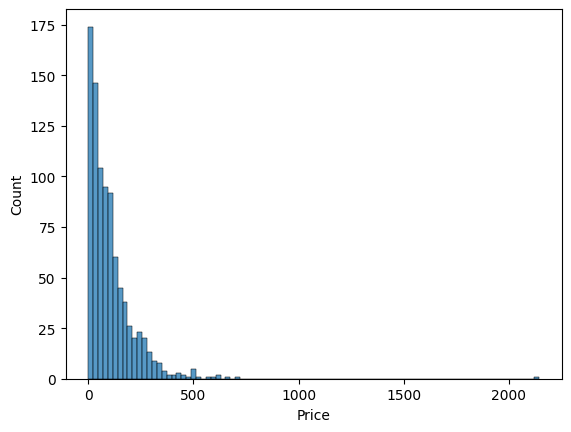

In [120]:
sns.histplot(df['Price'])

When looking at this graph it is positively scewed but more importantly there is an outlier in the data that must be removed

Below we determine the index of the outlier

In [121]:
df[df['Price'] > 1000]

,Product,Region,Price,Units Sold,Sale Date
969,Product_15,Region_8,2143.3,5.0,2024-08-27


Removing the outlier

In [122]:
df.drop(969, axis = 0, inplace = True)

Checking the graph again to ensure the outlier was removed

<Axes: xlabel='Price', ylabel='Count'>

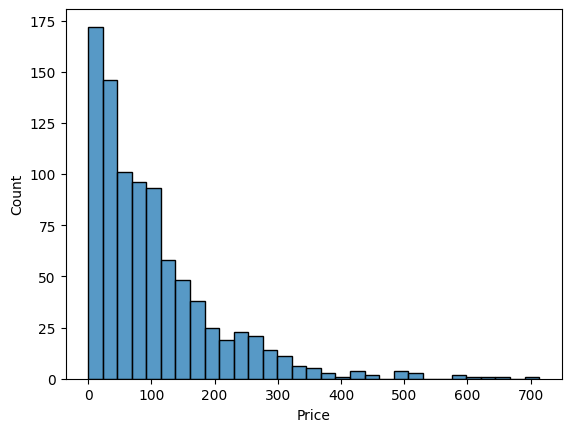

In [123]:
sns.histplot(df['Price'])

<Axes: xlabel='Units Sold', ylabel='Count'>

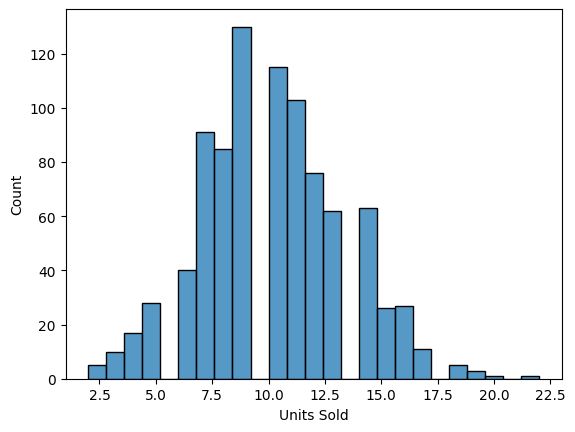

In [124]:
sns.histplot(df['Units Sold'])

This graph tells us the frequency of the amount of items sold, this seems to be normally distributed but has bins with no values in them. With this I just assume the company does not sell bundles in that specific amount of items. There appear to be no clear outliers.

<Axes: >

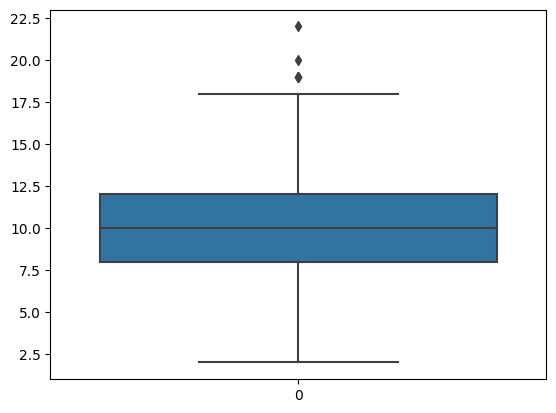

In [125]:
sns.boxplot(df['Units Sold'])

Using a boxplot just as a double check to ensure there are no clear outliers

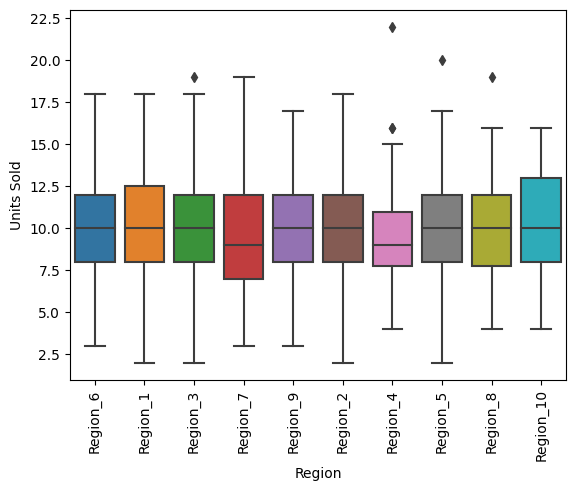

In [126]:
sns.boxplot(data = df, x = 'Region', y = 'Units Sold') 
plt.xticks(rotation = 90)
plt.show()

Using the boxplot to see if there is an outlier in the amount of units sold in each region. There are some values that the boxplot considers outliers but nothing is so far away from the IQR that it is concering so I will not remove any values.

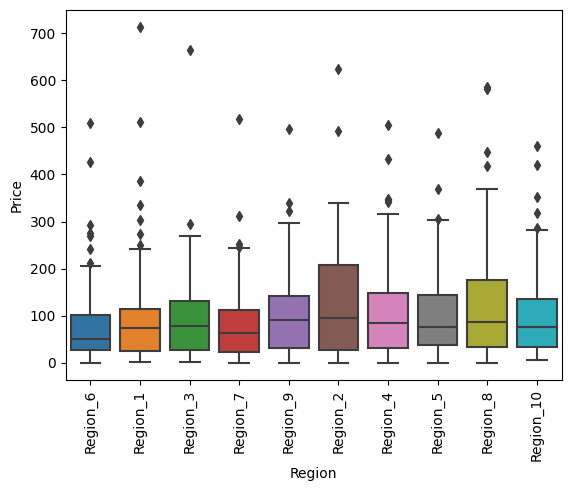

In [127]:
sns.boxplot(data = df, x = 'Region', y = 'Price')
plt.xticks(rotation = 90)
plt.show()

Looking at the price breakdown for each of the regions. Despite there being a lot of very high values for some of the regions I don't think these are necessary to remove. The first reason is because all regions have high values and the second reason is one value is not so far away from the others and out on its own. For these reasons I will keep the all of this data for my analysis.

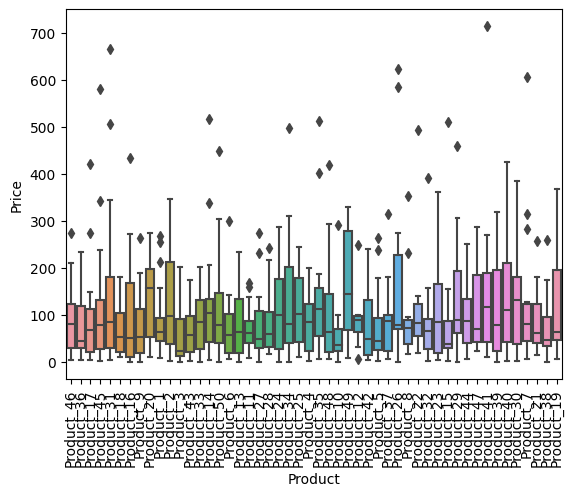

In [128]:
sns.boxplot(data = df, x = 'Product', y = 'Price')
plt.xticks(rotation = 90)
plt.show()

I then looked at the price breakdown for each product. For a similar reason to the price region breakdown I will keep all of these values.

Below I am filling in the missing values. For categorical data such as Region and Product I fill them with other as to not assign values to the incorrect category. For the numerical data I use the median as opposed to the mean. This is because there are some high values in each region that could scue the mean higher than desired. Therefore, I believe median is the best measure of central tendency in this approach to fill the missing values.

In [129]:
df['Region'] = df['Region'].fillna("Other")

In [130]:
df['Product'] = df['Product'].fillna("Other")

In [131]:
df['Price'] = df['Price'].fillna(df['Price'].median())

In [132]:
df['Units Sold'] = df['Units Sold'].fillna(df['Units Sold'].median())

The below command adds a revenue column that takes the units sold and price column and takes the product of the two numbers and assigned it into the revenue column. This will make it easier to see the total impact of each region and product. 

In [133]:
df['Revenue'] = df['Units Sold'] * df['Price']

Take another look at the data now that I have added an additional column

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     999 non-null    object 
 1   Region      999 non-null    object 
 2   Price       999 non-null    float64
 3   Units Sold  999 non-null    float64
 4   Sale Date   999 non-null    object 
 5   Revenue     999 non-null    float64
dtypes: float64(3), object(3)
memory usage: 86.9+ KB


In [135]:
df.describe(include = 'all')

,Product,Region,Price,Units Sold,Sale Date,Revenue
count,999,999,999.000000,999.000000,999,999.000000
unique,51,11,NaN,NaN,999,NaN
top,Other,Region_9,NaN,NaN,2022-01-01,NaN
freq,100,104,NaN,NaN,1,NaN
mean,NaN,NaN,101.368639,10.066066,NaN,1007.316436
std,NaN,NaN,98.589915,3.000942,NaN,1045.559304
min,NaN,NaN,0.200000,2.000000,NaN,0.990000
25%,NaN,NaN,33.650000,8.000000,NaN,295.585000
50%,NaN,NaN,76.010000,10.000000,NaN,737.330000
75%,NaN,NaN,133.080000,12.000000,NaN,1333.355000


In [136]:
df.head(10)

,Product,Region,Price,Units Sold,Sale Date,Revenue
0,Other,Region_6,75.96,10.0,2022-01-01,759.60
1,Other,Region_1,175.78,8.0,2022-01-02,1406.24
2,Product_46,Region_3,20.43,12.0,2022-01-03,245.16
3,Product_36,Region_1,12.77,10.0,2022-01-04,127.70
4,Product_17,Region_6,125.69,6.0,2022-01-05,754.14
5,Product_45,Region_1,8.63,11.0,2022-01-06,94.93
6,Product_31,Region_3,23.73,6.0,2022-01-07,142.38
7,Product_18,Region_7,19.27,9.0,2022-01-08,173.43
8,Product_16,Region_9,30.70,14.0,2022-01-09,429.80
9,Product_9,Region_2,264.05,7.0,2022-01-10,1848.35


See the total amount of units sold for each region. This shows us that Region 10 and Region 9 sell the most products where Region 7 and Region 2 are the regions that sell the least units

In [137]:
df.groupby('Region')['Units Sold'].sum()

Region
Other        1007.0
Region_1      866.0
Region_10    1059.0
Region_2      801.0
Region_3      913.0
Region_4      960.0
Region_5      900.0
Region_6      876.0
Region_7      727.0
Region_8      888.0
Region_9     1059.0
Name: Units Sold, dtype: float64

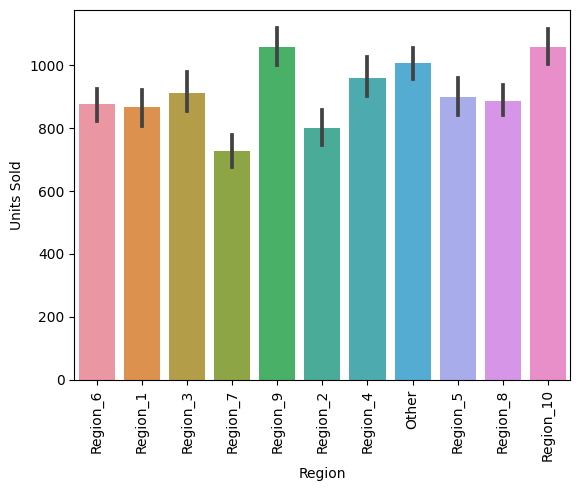

In [138]:
sns.barplot(data = df, x = 'Region', y = 'Units Sold', estimator=np.sum)
plt.xticks(rotation = 90)
plt.show()

Now I take a look at the average price that each region sells its products at. Region 6 sells its products at a much lower average price than any other region. Region 9 sells its products at the highest average price. All other regions sell at a fairly even average price. 

In [139]:
df.groupby('Region')['Price'].median()

Region
Other        76.010
Region_1     76.010
Region_10    76.010
Region_2     80.735
Region_3     76.010
Region_4     76.010
Region_5     76.010
Region_6     59.210
Region_7     76.010
Region_8     76.010
Region_9     86.085
Name: Price, dtype: float64

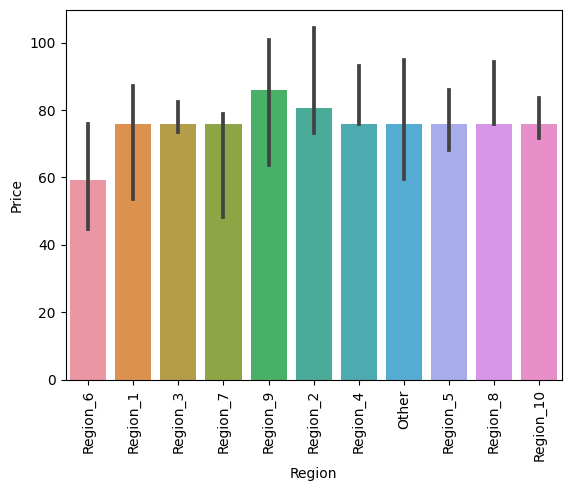

In [140]:
sns.barplot(data = df, x = 'Region', y = 'Price', estimator=np.median)
plt.xticks(rotation = 90)
plt.show()

Then I looked at the combination of units sold and price through the revenue variable and how that was for each of the regions. Region 7s revenue is well below all of the others which is most likely due to that region selling the least amount of products. Region 6 and 3 also have low revenues. Region 6 can be attributed to its low prices and region 3 is low in both units sold and price. Region 2,4,8,9,10 all have high revenues and do not need to be looked at much further as they are clearly doing well. Region 1 and 5 have decent revenues and are not that low in the units sold and price and can be left. 

In [141]:
df.groupby('Region')['Revenue'].sum()

Region
Other        106170.83
Region_1      82644.30
Region_10    100498.37
Region_2      96598.02
Region_3      77641.36
Region_4     100225.02
Region_5      87897.25
Region_6      72756.97
Region_7      63597.38
Region_8     107507.60
Region_9     110772.02
Name: Revenue, dtype: float64

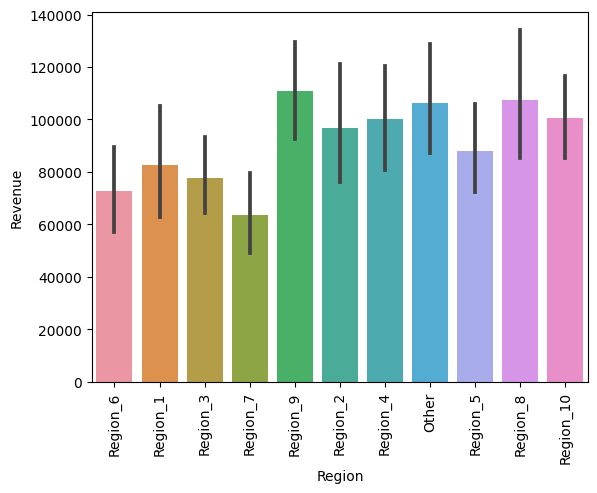

In [142]:
sns.barplot(data = df, x = 'Region', y = 'Revenue', estimator=sum)
plt.xticks(rotation = 90)
plt.show()

I then took a look at the amount of units sold for each product and they were fairly even across each of the products. The variability I believe could be explained by some products being more relevant than others and some having down years. I don't think any large conclusions can be made from this data.

In [143]:
df.groupby('Product')['Units Sold'].sum()

Product
Other         979.0
Product_1     238.0
Product_10    179.0
Product_11    153.0
Product_12    139.0
Product_13    253.0
Product_14    202.0
Product_15    197.0
Product_16    185.0
Product_17    177.0
Product_18    142.0
Product_19    200.0
Product_2     201.0
Product_20    153.0
Product_21    168.0
Product_22    148.0
Product_23    216.0
Product_24    163.0
Product_25    160.0
Product_26    119.0
Product_27    172.0
Product_28    166.0
Product_29    196.0
Product_3     128.0
Product_30    247.0
Product_31    209.0
Product_32    145.0
Product_33    247.0
Product_34    174.0
Product_35    186.0
Product_36    117.0
Product_37    183.0
Product_38    122.0
Product_39    153.0
Product_4     243.0
Product_40    184.0
Product_41    176.0
Product_42    181.0
Product_43    245.0
Product_44    173.0
Product_45    228.0
Product_46    187.0
Product_47    125.0
Product_48    218.0
Product_49    127.0
Product_5     260.0
Product_50    241.0
Product_6     148.0
Product_7     187.0
Product_8   

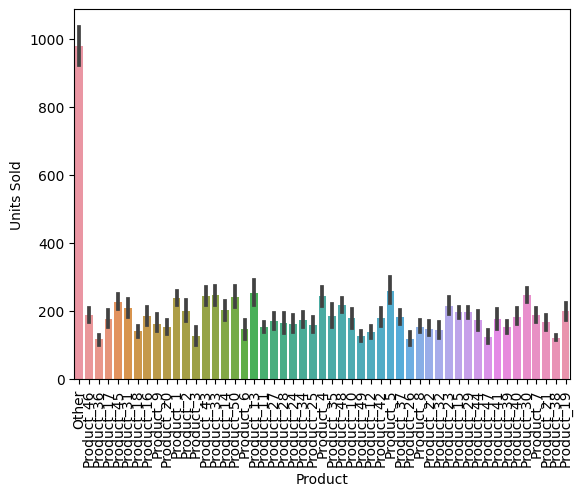

In [144]:
sns.barplot(data = df, x = 'Product', y = 'Units Sold', estimator=np.sum)
plt.xticks(rotation = 90)
plt.show()

In [145]:
df.groupby('Product')['Units Sold'].sum().sort_values(ascending=True)

Product
Product_36    117.0
Product_26    119.0
Product_38    122.0
Product_47    125.0
Product_49    127.0
Product_3     128.0
Product_12    139.0
Product_18    142.0
Product_32    145.0
Product_6     148.0
Product_22    148.0
Product_20    153.0
Product_8     153.0
Product_39    153.0
Product_11    153.0
Product_25    160.0
Product_24    163.0
Product_9     163.0
Product_28    166.0
Product_21    168.0
Product_27    172.0
Product_44    173.0
Product_34    174.0
Product_41    176.0
Product_17    177.0
Product_10    179.0
Product_42    181.0
Product_37    183.0
Product_40    184.0
Product_16    185.0
Product_35    186.0
Product_7     187.0
Product_46    187.0
Product_29    196.0
Product_15    197.0
Product_19    200.0
Product_2     201.0
Product_14    202.0
Product_31    209.0
Product_23    216.0
Product_48    218.0
Product_45    228.0
Product_1     238.0
Product_50    241.0
Product_4     243.0
Product_43    245.0
Product_33    247.0
Product_30    247.0
Product_13    253.0
Product_5   

In [146]:
df.groupby('Product')['Price'].median()

Product
Other          76.010
Product_1      73.900
Product_10     49.800
Product_11     69.215
Product_12     76.010
Product_13     76.010
Product_14    104.210
Product_15     64.260
Product_16     59.235
Product_17     69.510
Product_18     58.305
Product_19     72.820
Product_2      93.400
Product_20    135.180
Product_21     62.500
Product_22     80.640
Product_23     76.010
Product_24     76.010
Product_25    102.430
Product_26     79.595
Product_27     54.775
Product_28     63.170
Product_29     89.410
Product_3      27.620
Product_30    131.540
Product_31     84.810
Product_32     76.010
Product_33     76.010
Product_34     76.010
Product_35     76.010
Product_36     46.190
Product_37     88.450
Product_38     46.630
Product_39     78.630
Product_4      76.010
Product_40    111.980
Product_41     83.730
Product_42     72.430
Product_43     68.530
Product_44     76.010
Product_45     78.600
Product_46     76.010
Product_47     76.010
Product_48     65.245
Product_49    144.400
Pr

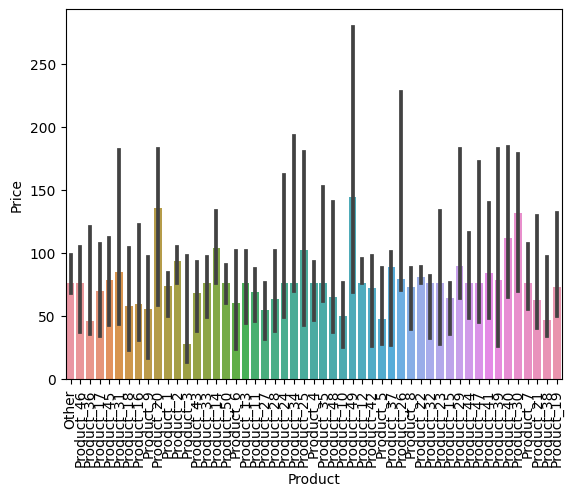

In [147]:
sns.barplot(data = df, x = 'Product', y = 'Price', estimator=np.median)
plt.xticks(rotation = 90)
plt.show()

In [148]:
df.groupby('Product')['Price'].sum().sort_values(ascending=False)

Product
Other         10091.34
Product_31     3047.51
Product_40     3015.94
Product_30     2861.66
Product_45     2818.62
Product_29     2648.34
Product_41     2472.25
Product_35     2437.73
Product_19     2379.34
Product_14     2371.96
Product_2      2359.66
Product_50     2271.81
Product_33     2243.88
Product_23     2205.47
Product_26     2188.95
Product_7      2148.98
Product_1      2110.74
Product_34     2102.14
Product_13     2087.16
Product_48     2079.04
Product_39     2064.58
Product_5      2042.41
Product_49     2016.09
Product_20     1953.80
Product_4      1881.17
Product_25     1874.25
Product_16     1847.35
Product_17     1722.62
Product_46     1687.17
Product_44     1656.13
Product_24     1652.40
Product_22     1600.87
Product_37     1573.83
Product_15     1513.82
Product_43     1486.31
Product_42     1445.10
Product_47     1426.12
Product_32     1389.74
Product_21     1375.93
Product_28     1326.94
Product_8      1271.15
Product_6      1263.79
Product_27     1249.75
Pro

I then took a look at the average price for each of the products. Product 3 has a much lower price than the rest where product 49 and 20

In [149]:
df.groupby('Product')['Revenue'].sum()

Product
Other         96372.99
Product_1     20547.99
Product_10    12224.45
Product_11    11205.88
Product_12    12490.76
Product_13    18820.49
Product_14    26469.59
Product_15    16382.32
Product_16    21586.13
Product_17    15244.08
Product_18    10134.19
Product_19    20555.62
Product_2     24232.72
Product_20    21599.70
Product_21    14307.49
Product_22    15820.41
Product_23    21818.22
Product_24    15621.71
Product_25    17429.03
Product_26    23656.82
Product_27    13272.76
Product_28    14136.01
Product_29    25905.98
Product_3      8343.84
Product_30    30653.45
Product_31    30068.49
Product_32    12309.47
Product_33    20648.50
Product_34    20738.83
Product_35    25212.61
Product_36    10181.94
Product_37    15418.43
Product_38     9102.24
Product_39    17575.40
Product_4     19685.65
Product_40    26677.48
Product_41    24108.75
Product_42    13385.54
Product_43    15328.21
Product_44    15138.05
Product_45    24982.45
Product_46    16599.47
Product_47    12634.70
Pro

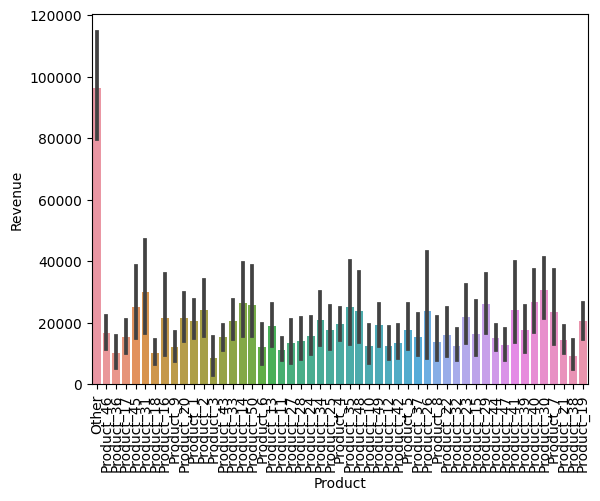

In [150]:
sns.barplot(data = df, x = 'Product', y = 'Revenue', estimator=np.sum)
plt.xticks(rotation = 90)
plt.show()

Revenue is consistent across all of the different products

Below I create columns that identify which year or month the date in the data is in. For the month column, it checks the sale date and gives it a value of 1-12 depending on which month it is in. 

In [151]:
df['Month'] = pd.DatetimeIndex(df['Sale Date']).month

In [152]:
df['Year'] = pd.DatetimeIndex(df["Sale Date"]).year

<Axes: xlabel='Month', ylabel='Price'>

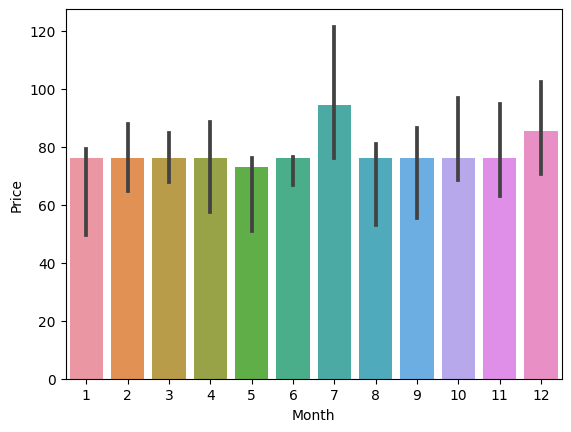

In [153]:
sns.barplot(data = df, x = 'Month', y = 'Price', estimator=np.median)

This graph shows us that the average price across the time of the data is fairly consistent acrosss all months but is much higher in the month of July and slightly more in the month of December. 

<Axes: xlabel='Year', ylabel='Price'>

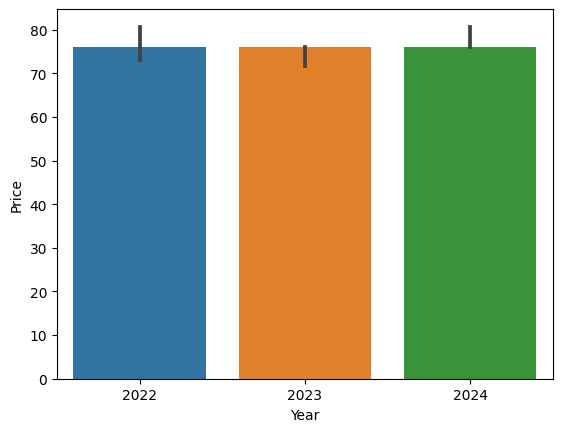

In [154]:
sns.barplot(data = df, x = 'Year', y = 'Price', estimator=np.median)

This graphs shows us that the average price did not change very much over the course of the three years the data was collected

<Axes: xlabel='Month', ylabel='Units Sold'>

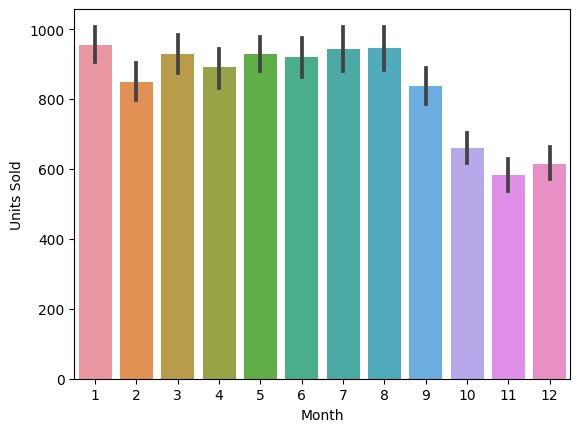

In [155]:
sns.barplot(data = df, x = 'Month', y = 'Units Sold', estimator=np.sum)

For the first 8 months of the year the amount of units sold does not change that much. However there seems to be a drop off for months 9 through 12. This can be explained by missing data from the year 2024. The only month that I will draw attention to is February where the amount of products sold seems to be a decent amount lower than the others but that can most likely be described by February being the shortest month.

1) What conclusions can you draw about sales performance of various products and regions?

My Analysis was based on each products and regions average price, total units sold and a created column revenue which is the product of units sold and price

Regional Price Analysis - The price of product sold in Region 6 is much lower than the average price of other regions. Region 9 sells the highest average price of product. All other regions sell at a similar price and there is nothing special concerning their prices. 

Regional Units Sold Analysis - Region 10 and 9 sell the most products. Region 2 and 7 sell the least.

Regional Revenue Analysis - Region 7 has a revenue value that is well below all of the others regions. Region 3 and 6 also have low revenues. Regions 2, 4, 8, 9, and 10 all have high revenues. 

Regional Conclusions -  Region 7 has very little revenue which can be attributable to its low amount of sales. Region 6 also has low revenue which could be due to the price of product being sold being much lower than any other region. All of the regions with high revenues can be looked at when deciding what improvements to be made as they are all doing very well. 

Product Price Analysis - Product 3 sells at a much lower average cost than all other products. Product 31 and 40 sell at a much higher average cost. 

Product Units Sold Analysis - Number of units sold was fairly even across the different products and the differences could be attributed to product relevance and popularity

Product Revenue Analysis - Product 3 and 38 have very low revenues. Both of these products have both a very low price and a very low number of units sold. Product 31 and 40 both have very high revenues which tells us that despite the high cost, they also have a high number of units sold. 

Product Conclusions - Some products must be more popular than others as some are able to sell at higher prices while maintaining high units sold where some fail to sell many units despite a very low cost. 

Monthly Analysis - July and December have higher average prices than any other month. The number of units sold across each month is consistent throughout the year.

Yearly Analysis - The average price of the data does not change over the course of the three years

Time Conclusions - The company chooses to increase prices at the beginning of Q3 and at the end of the year without influencing units sold. The months at the end of the year have lower products sold which can be attributed to missing data. February also has less units solf which is most likely due to the month having less days. This could could show customers need for products could increase at these times and the company decides to take advantage of it. The average price did not increase over the course of the 3 years. 

2) What recommendations do you have for the business?

Try to sell more expensive products in Region 6
    
    Region 6 sells products at an average price much lower than other regions. Pushing more expensive products could benefit the revenue of this region as the amount of units is sells is fairly high. 

Promote more in Region 7
    
    Region 7 sells the least amount of units across all of the regions. Promotion efforts could be shifted to this region to help it catch up to the other regions. 

Phase out product 38 and 3
    
    Products 38 and 3 have a very low price and still are unable to sell a lot of units. Unless these products are necessary phasing out these products could help regions focus more on selling more profitable and more sought after products. 

Imitate the strategy used for product 31 and 40 for other products
    
    These products are the highest performing by a good margin. Determining how the company promotes and sells these products can be good information to possible imitate and apply to less successful products. 

Target the price increase in July and December
    
    Since the price increase in these months does not influence the amount of units sold, the company can target this. The company could do this by offering promotions and increasing advertising to promote more companies to buy during this time.

3) Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?

Remove Duplicates
    
    I chose to remove the 50 identical values. This was because since they were completely identical, from date to product to price, I deemed them an input error and removed them. I removed them using the drop duplicated function to remove all exact duplicates

Removing Price Outlier
    
    When looking at the price data it was clear there was one value much greater than the others and had to be removed. If this data point was kept it could heavily scew the data and make prices appear much higher than they really are. I began by finding the index of the value by seeing all price values over 1000. With this I found the index 969 and used the drop function to remove that index. 

Filling Empty Values
    
    For the categorical data I decided to give the missing values the value of other. I did this to not assing the unknown data to different regions or products that could heavily influence the averages to these categories. I did this by using the fillna function and giving it the parameter other. 
    For the numerical data I replace the missing values with the medians of all of the units sold and prices. I used median instead of mean because there are some high values in each region that could scue the mean higher than desired. Therefore, I believe median is the best measure of central tendency in this approach to fill the missing values. I replaced these values by using the fillna function again but I gave it the parameter of the median value of the price or units sold. 